### Regularization from the chapter of Ian Goodfellow

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
device = 'cuda' if torch.cuda.is_available() else 'cpu'
np.random.seed(0)

In [180]:
# Define the model
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size, eta = 0.1):
        super(LinearRegression, self).__init__()
        self.linear = nn.Sequential(
            nn.Linear(input_size, 5),
            nn.Linear(5, 10),
            nn.Sigmoid(),
            nn.Linear(10, 5),
            nn.Linear(5, output_size)
        )
        self.N = torch.distributions.Normal(0, eta * 1)
        self.eta = eta

    def forward(self, x):
        y = self.linear(x)
        return y

In [170]:
x_values = np.array([np.array([i]) for i in range(1, 6)])
x = torch.tensor(x_values, dtype=torch.float32)
y_values = np.array([2 * i + 3 + 5 * (np.random.rand() - 0.5) for i in x_values])
y = torch.tensor(y_values, dtype=torch.float32)
train_data = list(zip(x, y))

In [171]:
loss_fn = nn.MSELoss().to(device=device)
learning_rate = 0.01
epochs = 5000

In [172]:
model = LinearRegression(1, 1).to(device=device)
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
for epoch in range(epochs):
    y_hat = model(x)
    optimizer.zero_grad()
    loss = loss_fn(y, y_hat)
    loss.backward()
    optimizer.step()
    if epoch % 500 == 0:
        error = torch.linalg.norm(loss).item()
        print(f"Error for epoch {epoch + 1}: {error}")

Error for epoch 1: 73.9979019165039
Error for epoch 501: 1.9950764179229736
Error for epoch 1001: 1.5169618129730225
Error for epoch 1501: 1.363244652748108
Error for epoch 2001: 1.2642966508865356
Error for epoch 2501: 1.1010267734527588
Error for epoch 3001: 0.15347646176815033
Error for epoch 3501: 0.009127852506935596
Error for epoch 4001: 0.0008165618637576699
Error for epoch 4501: 7.695819658692926e-05


In [188]:
model_noise = LinearRegression(1, 1,eta=20)
optimizer_noise = torch.optim.SGD(model_noise.parameters(), lr = learning_rate)
for epoch in range(epochs):
    optimizer_noise.zero_grad()
    y_ = model_noise(x)
    y_hat = y_ + model_noise.N.sample(x.shape)
    loss = loss_fn(y, y_hat)
    loss.backward()
    optimizer_noise.step()
    if epoch % 500 == 0:
        error = torch.linalg.norm(loss).item()
        print(f"Error for epoch {epoch + 1}: {error}")

Error for epoch 1: 281.0024108886719
Error for epoch 501: 803.8250122070312
Error for epoch 1001: 61.73015213012695
Error for epoch 1501: 199.5711212158203
Error for epoch 2001: 1139.285400390625
Error for epoch 2501: 586.6561279296875
Error for epoch 3001: 89.49115753173828
Error for epoch 3501: 630.9744873046875
Error for epoch 4001: 83.74162292480469
Error for epoch 4501: 163.37728881835938


[]

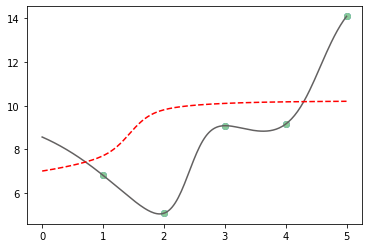

In [189]:
plt.scatter(x, y)
test_x = torch.tensor([[x] for x in np.linspace(0, 5, 200)], dtype=torch.float32)
test_y = model(test_x)
test_y_noise = model_noise(test_x)
plt.scatter(x, y, color = '#88c999')
plt.plot(test_x.transpose(-1, 0)[0].detach().numpy(), test_y.transpose(-1, 0)[0].detach().numpy(), color = "#636161")
plt.plot(test_x.transpose(-1, 0)[0].detach().numpy(), test_y_noise.transpose(-1, 0)[0].detach().numpy(), 'r--')
plt.plot()

## Result
- Here in the above plot we can see that that output for **model wihtout noise(purple)** is more sensitive to input. 
- But for **model with noise(red)**, it is less sensitive to input as it is trained with inbuilt noise.
- With increasing value of eta, we can see that the capacity of model decreases, so we can conclude that adding noise can act as a form of regularization.

In normal model, the loss function is:  
$J = E_p(x, y) [y(x) - t]$

But, in another model we add random amount of noise $\epsilon_W ~ \mathcal{N} (\mu, \eta I)$ and now the cost function becomes:  
$J = E_p(x, y, \epsilon_W) [y_{\epsilon_W}(x) - t]$